# Covid 19 status between 2019 and 2022  

## Investigation Overview

In this investigation, I wanted to look at covid19 damages in 2019 and compare to the situation in end 2022. As we know, with the arrival of vaccines and heath barrier measures , the virus should be contained and normally we should have least deaths and more recovered. Let's discover what is about.
## Dataset Overview

This dataset has information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.Added to data gathered in 2022.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_final = pd.read_csv('./final_dataCov19.csv')

In [3]:
#Let's build categorical 
# list of conditions
conditions = [
    (df_final['total_cases_per_million'] <= 100),
    ((df_final['total_cases_per_million'] > 100) & (df_final['total_cases_per_million'] <= 1000)),
    ((df_final['total_cases_per_million'] > 1000) & (df_final['total_cases_per_million'] <= 100000)),
    (df_final['total_cases_per_million'] > 100000) 
    ]

# Persona class for each condition
values = ['Green_Zone','Orange_Zone','Red_Zone','Red_Scarlet_Zone']

df_final['Cov_zone'] = np.select(conditions, values)
cov_rep = df_final[['country','total_cases','total_death','total_tests','population','total_recovered','continent','year','serious_critical','Cov_zone']].sort_values('total_cases',ascending = False ).reset_index()
#cov_rep.head(20)

## Distribution of Covid cases between 2019 and 2022
It is clear that compared to the situation in 2019, global cases have decreased significantly due to the effect of vaccines and sanitary measures. The distribution is bimodal and shows that in 2019 most countries were affected. The number of covid tests and deathshas decreased from 2019 to 2022 because many countries have been moved to the green zone.


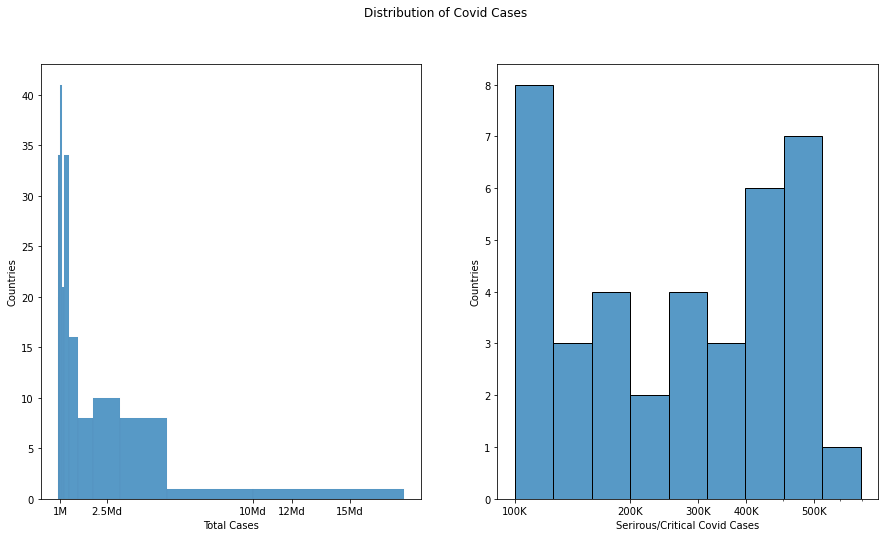

In [4]:
fig, ax =plt.subplots(ncols =2,figsize =[15,8])
log_binsize = 0.25
bins = 10 ** np.arange(5, np.log10(df_final['total_cases'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'total_cases',bins = bins,ax=ax[0])
#plt.xlim(xlimx,xlimy)
#plt.yticks(tick,tick_label)
#ax[0].set_xscale('log')
ax[0].set_xlabel('Total Cases')
ax[0].set_ylabel('Countries')
ax[0].set_xticks([1e6, 2.5e7,10e7, 12e7, 15e7] )
ax[0].set_xticklabels(['1M', '2.5Md','10Md', '12Md', '15Md'])
log_binsize = 0.1
bins = 10 ** np.arange(5, np.log10(df_final['serious_critical'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'serious_critical', bins = bins,ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('Serirous/Critical Covid Cases')
ax[1].set_ylabel('Countries')
ax[1].set_xticks([1e5, 2e5,3e5, 4e5, 6e5] )
ax[1].set_xticklabels(['100K', '200K','300K', '400K', '500K'])
plt.suptitle('Distribution of Covid Cases')
plt.show()

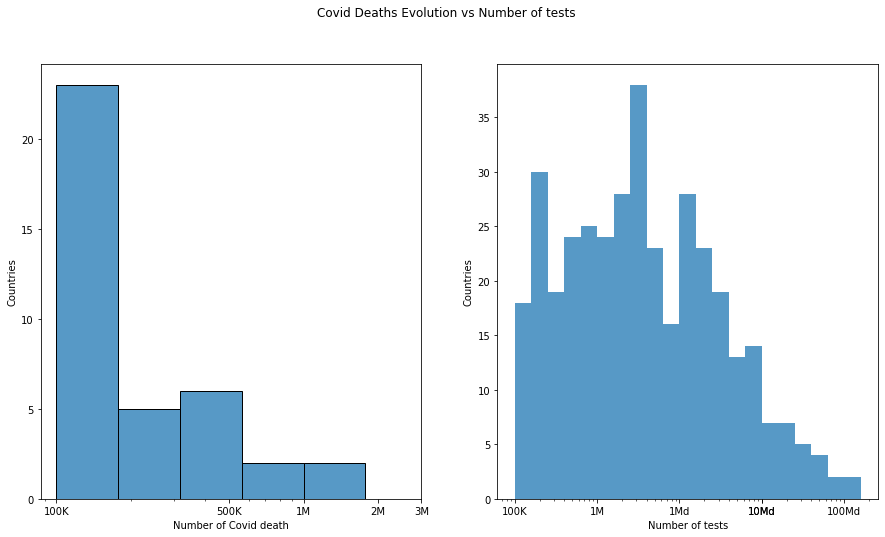

In [5]:
fig, ax =plt.subplots(ncols =2,figsize =[15,8])
log_binsize = 0.25
bins = 10 ** np.arange(5, np.log10(df_final['total_death'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'total_death',bins = bins,ax=ax[0])
#plt.xlim(xlimx,xlimy)
#plt.yticks(tick,tick_label)
ax[0].set_xscale('log')
ax[0].set_xlabel('Number of Covid death')
ax[0].set_xticks([100000, 500000,1000000, 2e6, 3e6] )
ax[0].set_xticklabels(['100K', '500K','1M', '2M', '3M'])
ax[0].set_ylabel('Countries')
log_binsize = 0.2
bins = 10 ** np.arange(5, np.log10(df_final['total_tests'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'total_tests', bins = bins,ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('Number of tests')
ax[1].set_ylabel('Countries')
ax[1].set_xticks([100000, 1e6,100e6, 1e7, 10e7, 100e7] )
ax[1].set_xticklabels(['100K', '1M','100M', '1Md','10Md','100Md'])
plt.suptitle('Covid Deaths Evolution vs Number of tests')
plt.show()

## Distribution per continent and per zone between 2019 and 2022

There is no big differences between the number of deaths in 2019 and 2022. But that a good point. That proves the efficiency of vaccines and health barrier measures. We arrived to contain the mortal side of virus.

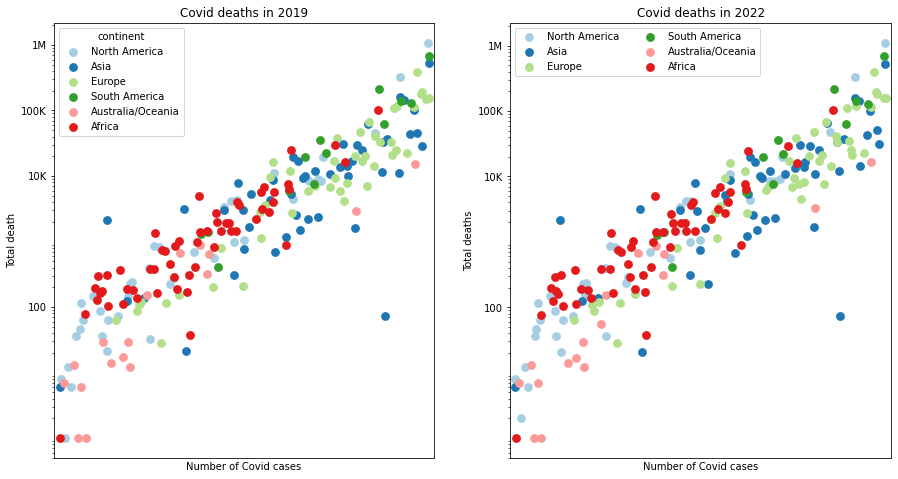

In [6]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'total_death', hue = 'continent',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[0])
ax[0].set_title('Covid deaths in 2019')
ax[0].set_ylabel('Total death')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'total_death', hue = 'continent',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[1])
ax[1].set_title('Covid deaths in 2022')
ax[1].set_ylabel('Total deaths')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

On the other hand, the number of critical cases exploded in 2022. Some dangerous and virulent variants of covid have emerged around the world, especially in many countries in Europe and Africa.

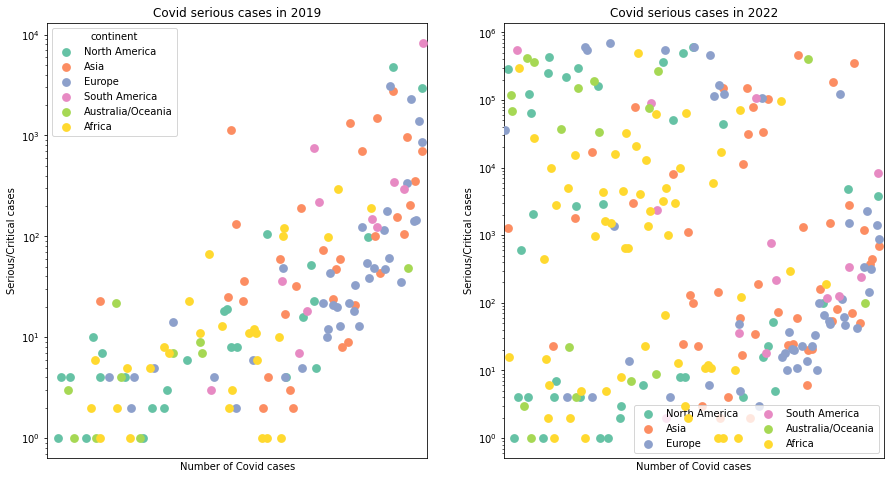

In [7]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'serious_critical', hue = 'continent',
           palette = 'Set2',linestyles='',dodge = 6,errorbar=None, ax=ax[0])
ax[0].set_title('Covid serious cases in 2019')
ax[0].set_ylabel('Serious/Critical cases')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
#ax[0].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
#ax[0].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'serious_critical', hue = 'continent',
           palette = 'Set2',linestyles='',dodge = 6,errorbar=None, ax=ax[1])
ax[1].set_title('Covid serious cases in 2022')
ax[1].set_ylabel('Serious/Critical cases')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
#ax[1].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
#ax[1].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

## Overview per zone

We know that currently `OMS`divided world countries into 2 kinds of zones (Orange and green). But for more visibility on improvement from Covid zones of begining , i splited into 4 groups: Green_Zone with least of 100 cases on a million of inhabitants ,Orange_Zone between 100 and 1000 cases on the million ,Red_Zone between 1000 and 100000 cases, and the worst Red_Scarlet_Zone with more than 100000 cases per million of inhabitants.

The split of countries based on total cases per million is very interesting. The famous Red scarlet Zone (>=100K cases per million inhabitants) count the highers number of death and total cases. More visible here, the number of deaths increase proportionnaly to number of cases per million inhabitants. Contrary with the number of recovered. There, we can thank the vaccine, we avoided a lot of deaths in Red scarlet zone.  


The number of deaths exploded in 2022 in orange zone (>100 and <1000 cases per million inhabitants). 

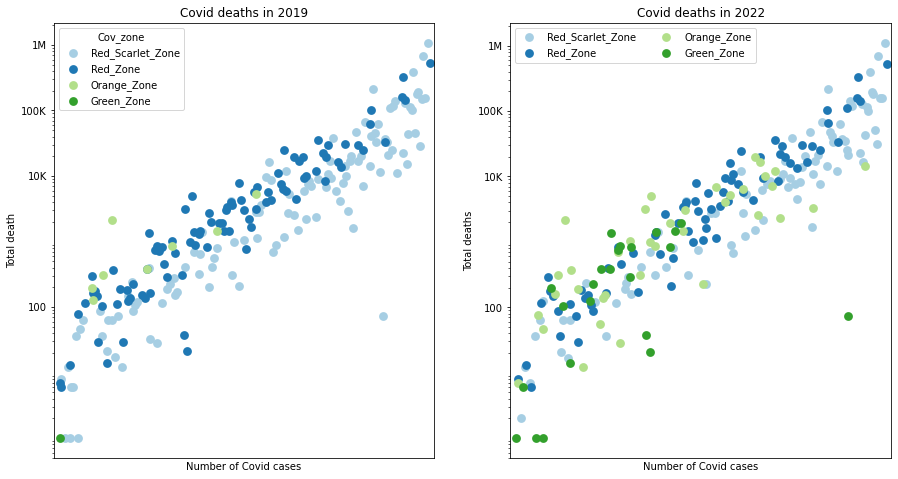

In [8]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'total_death', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[0])
ax[0].set_title('Covid deaths in 2019')
ax[0].set_ylabel('Total death')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'total_death', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[1])
ax[1].set_title('Covid deaths in 2022')
ax[1].set_ylabel('Total deaths')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

In 2022 we have more recovered especially in orange and green zone. 

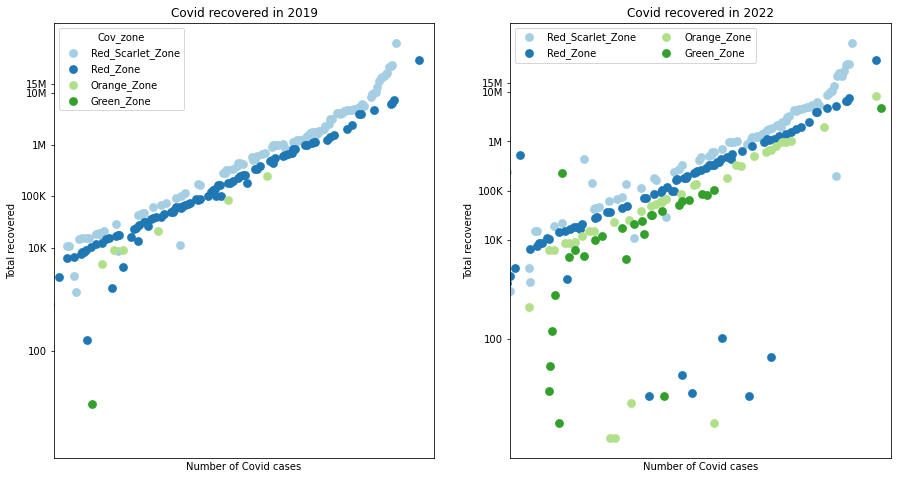

In [9]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'total_recovered', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[0])
ax[0].set_title('Covid recovered in 2019')
ax[0].set_ylabel('Total recovered')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'total_recovered', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[1])
ax[1].set_title('Covid recovered in 2022')
ax[1].set_ylabel('Total recovered')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

We can see that the number of critical cases has increased in the orange zone and in the red zone. Probably, the people who unfortunately could not resist died.

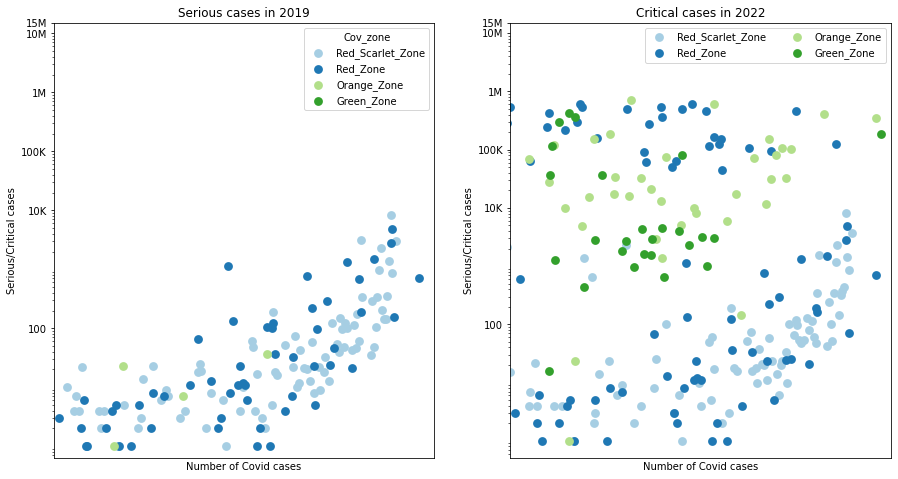

In [10]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'serious_critical', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[0])
ax[0].set_title('Serious cases in 2019')
ax[0].set_ylabel('Serious/Critical cases')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'serious_critical', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[1])
ax[1].set_title('Critical cases in 2022')
ax[1].set_ylabel('Serious/Critical cases')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

In [11]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Covid_19_part_II.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Covid_19_part_II.ipynb to slides
[NbConvertApp] Writing 954090 bytes to Covid_19_part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\SC00454\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  